## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# dropando valores nulos e substituindo no dataframe
df.dropna(inplace=True)

In [4]:
# criando variáveis dummy e dropando a primeira categoria
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [5]:
# convertendo variáveis bool em int
df = df.astype({col: int for col in df.select_dtypes('bool').columns})
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [6]:
# definindo y (variável resposta) e X (variáveis explicativas)
y = df.median_house_value

X = df.drop('median_house_value', axis=1)

In [7]:
# separando o conjunto de dados entre treino e teste a uma proporção de 70%/30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [8]:
# criando e treinando a árvore
reg = DecisionTreeRegressor(max_depth=4, random_state=100)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=100)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [9]:
# calculando o caminho de CCP na árvore (usa X_train, y_train)
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
path

{'ccp_alphas': array([0.00000000e+00, 1.83495183e+07, 2.22961934e+07, 2.36432271e+07,
        3.86436646e+07, 5.27864961e+07, 7.15085498e+07, 8.57135692e+07,
        1.53985568e+08, 1.67883576e+08, 1.78121224e+08, 1.96796461e+08,
        5.41911674e+08, 7.65503246e+08, 1.68402635e+09, 4.13252772e+09]),
 'impurities': array([5.16714398e+09, 5.18549350e+09, 5.20778969e+09, 5.23143292e+09,
        5.27007658e+09, 5.32286308e+09, 5.39437163e+09, 5.48008520e+09,
        5.63407077e+09, 5.80195434e+09, 5.98007557e+09, 6.17687203e+09,
        6.71878370e+09, 7.48428695e+09, 9.16831330e+09, 1.33008410e+10])}

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [10]:
regs = []
n_nodes = []
depths = []

for ccp in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=100, ccp_alpha=ccp)
    reg.fit(X_train, y_train)
    regs.append(reg)
    y_tr_pred = reg.predict(X_train)
    y_te_pred = reg.predict(X_test)
    n_nodes.append(reg.tree_.node_count)
    depths.append(reg.tree_.max_depth)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [11]:
train_mse = []
test_mse = []

for reg in regs:
    y_tr_pred = reg.predict(X_train)
    y_te_pred = reg.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_tr_pred))
    test_mse.append(mean_squared_error(y_test, y_te_pred))

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

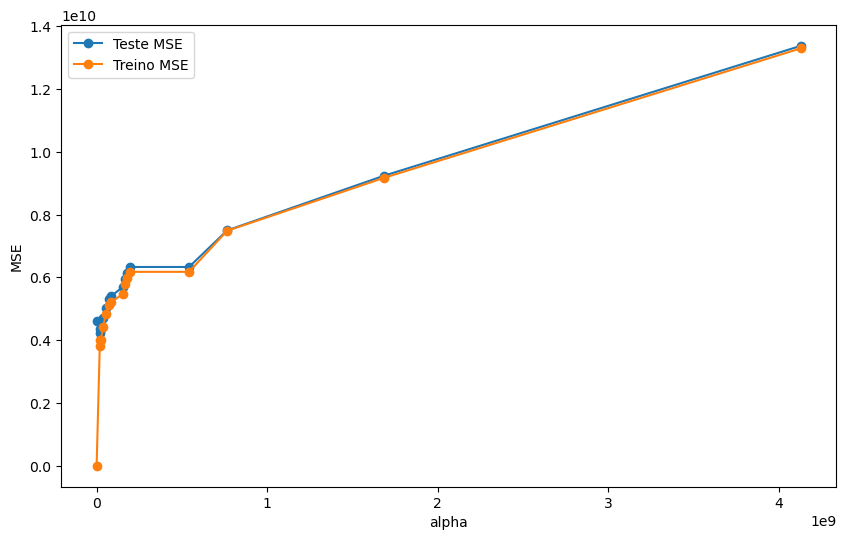

In [12]:
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, test_mse, marker='o', label='Teste MSE')
plt.plot(ccp_alphas, train_mse, marker='o', label='Treino MSE')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [13]:
# índice da árvore com menor erro de teste
idx_melhor = np.argmin(test_mse)

In [14]:
# pega a árvore correspondente
reg_melhor = regs[idx_melhor]

In [15]:
# calcula R² no treino e no teste
r2_train = reg_melhor.score(X_train, y_train)
r2_test = reg_melhor.score(X_test, y_test)

print("R² no treino:", r2_train)
print("R² no teste:", r2_test)

R² no treino: 0.7139913226646075
R² no teste: 0.6840186335619687


### 7. Visualize esta árvore.

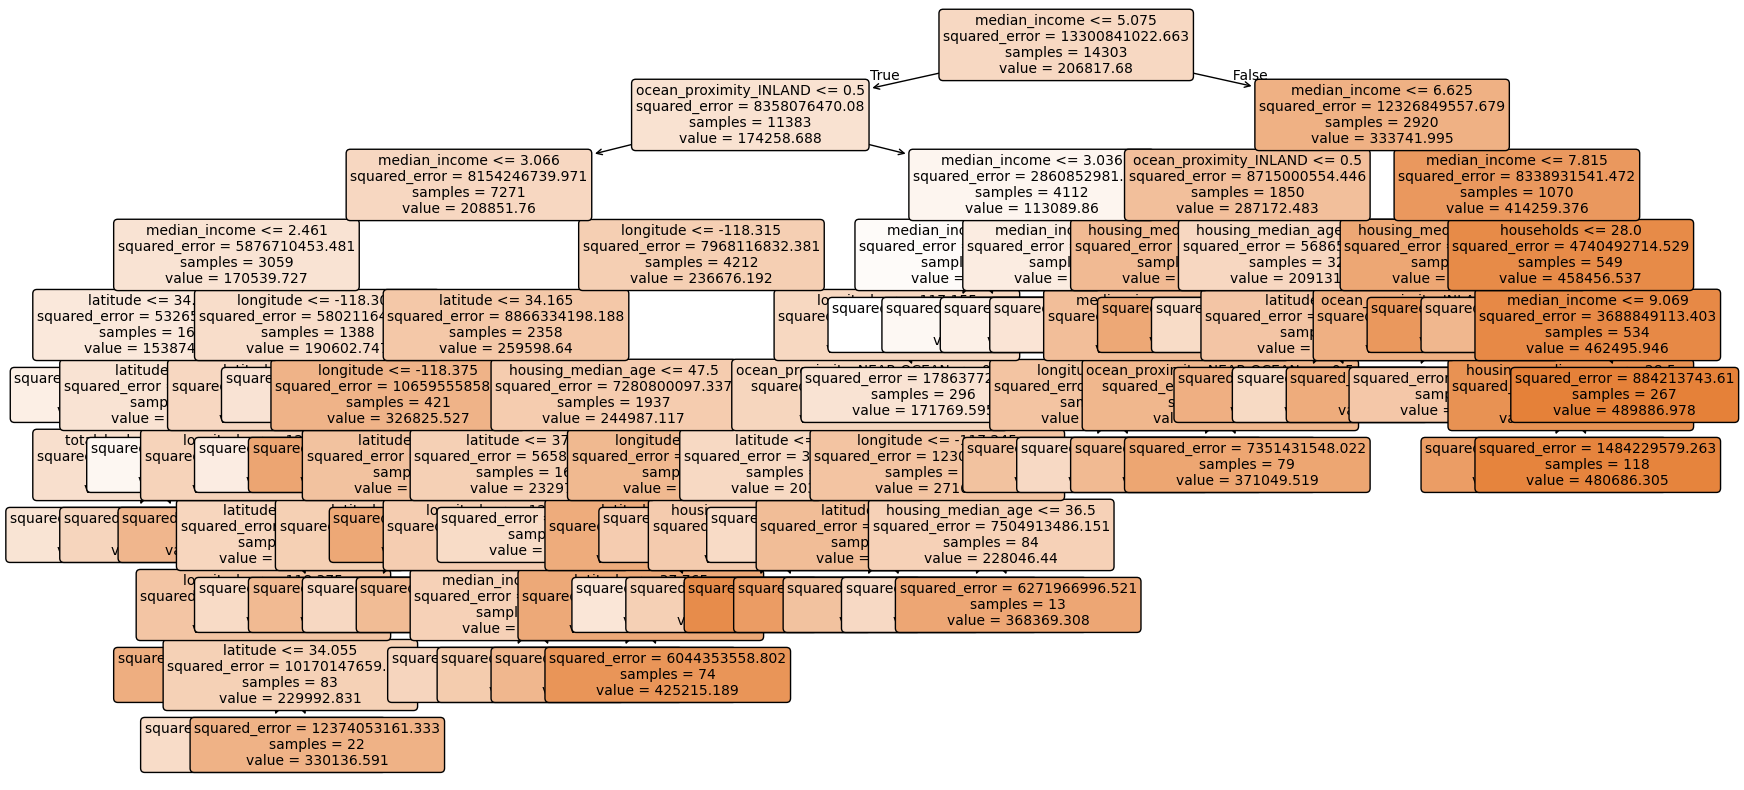

In [16]:
plt.figure(figsize=(20,10))
plot_tree(reg_melhor, 
          feature_names=X_train.columns,  
          filled=True,                    
          rounded=True,                   
          fontsize=10)                    
plt.show()